In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [3]:
#getting data
!wget -O fuel_consumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-10-14 19:19:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘fuel_consumption.csv’

100%[======================================>] 72,629       411KB/s   in 0.2s   

2020-10-14 19:19:36 (411 KB/s) - ‘fuel_consumption.csv’ saved [72629/72629]



In [4]:
#oading data

df= pd.read_csv("fuel_consumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#selecting features which is used for regression
cdf= df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,6.7,8.5,196
1,2.4,4,7.7,9.6,221
2,1.5,4,5.8,5.9,136
3,3.5,6,9.1,11.1,255
4,3.5,6,8.7,10.6,244


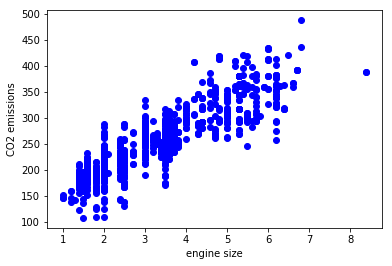

In [6]:
#enginesize vs emission

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'Blue')
plt.xlabel("engine size")
plt.ylabel("CO2 emissions")
plt.show()

In [7]:
#bifurcating training and testing data
msk = np.random.rand(len(df))<0.8
train = cdf[msk]
test = cdf[~msk]


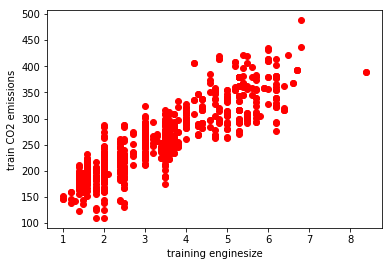

In [8]:
#training plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= 'red')
plt.xlabel("training enginesize")
plt.ylabel("train CO2 emissions")
plt.show()

# Multiple regression model

In [9]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.asanyarray(cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(cdf[["CO2EMISSIONS"]])
reg.fit(x,y)
#coeff and intercept
print(reg.coef_, reg.intercept_)

[[10.85524041  7.51622501  9.59563161]] [65.22328417]


In [10]:
y_hat = reg.predict(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(test[["CO2EMISSIONS"]])
print("residual sum of squares %.2f" %np.mean((y_hat-y)**2))


residual sum of squares 520.55


In [11]:
print("the score is %.2f" %reg.score(x,y))

the score is 0.84


In [12]:
#now performing regression by changing parameters

rdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
t= np.random.rand(len(df)) < 0.8

In [13]:
train= rdf[t]
test= rdf[~t]

In [14]:
reg2 = linear_model.LinearRegression()
x= np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y= np.asanyarray(train[["CO2EMISSIONS"]])
reg2.fit(x,y)
print(reg2.coef_, reg2.intercept_)

[[10.06032149  7.09020612  6.80091048  2.74504631]] [65.19283885]


In [20]:
y_hatt = reg2.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[["CO2EMISSIONS"]])
print("residual error sum %.2f" % np.mean((y_hatt-y)**2))

residual error sum 697.88


In [21]:
#checking the score
print("the score is %.2f " %reg2.score(x,y))

the score is 0.85 
